### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\julia\Hate Crime'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'hate_crime_wrangled.csv'))

In [6]:
#checking dataframe 
df.shape

(199797, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199797 entries, 0 to 199796
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   INCIDENT_ID               199797 non-null  int64 
 1   DATA_YEAR                 199797 non-null  int64 
 2   ORI                       199797 non-null  object
 3   PUB_AGENCY_NAME           199797 non-null  object
 4   AGENCY_TYPE_NAME          199797 non-null  object
 5   STATE_ABBR                199797 non-null  object
 6   STATE_NAME                199797 non-null  object
 7   DIVISION_NAME             199797 non-null  object
 8   REGION_NAME               199797 non-null  object
 9   POPULATION_GROUP_CODE     199797 non-null  object
 10  POPULATION_GROUP_DESC     199797 non-null  object
 11  INCIDENT_DATE             199797 non-null  object
 12  TOTAL_OFFENDER_COUNT      199797 non-null  int64 
 13  OFFENDER_RACE             199778 non-null  object
 14  VICT

In [8]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,1,White,1,Intimidation,1,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,1,Black or African American,1,Simple Assault,1,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1,Service/Gas Station,Anti-White,Individual,S,S


### 2. Exploring Relationships 

In [9]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [10]:
# Create subset excluding categorical variables.
sub = df[['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT','TOTAL_INDIVIDUAL_VICTIMS']]

In [11]:
# Create a correlation matrix using pandas

sub.corr()

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
TOTAL_OFFENDER_COUNT,1.000000,0.115758,0.189649
VICTIM_COUNT,0.115758,1.000000,0.832902
TOTAL_INDIVIDUAL_VICTIMS,0.189649,0.832902,1.000000


In [12]:
sub.shape

(199797, 3)

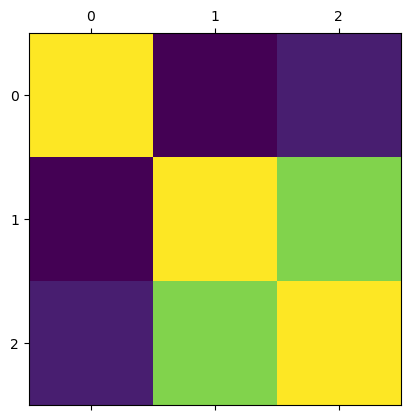

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

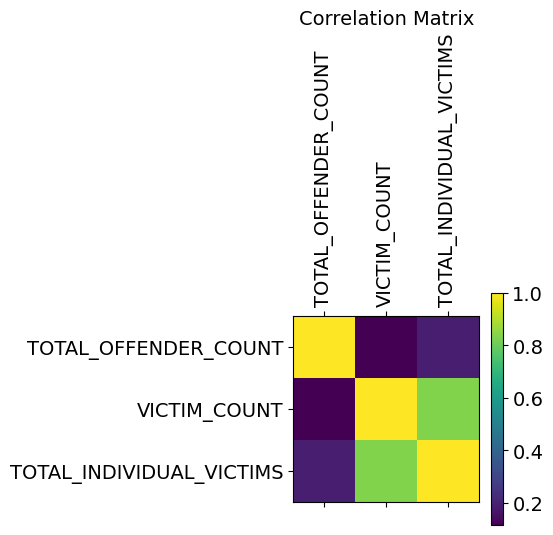

In [14]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(3, 3)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation = 90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

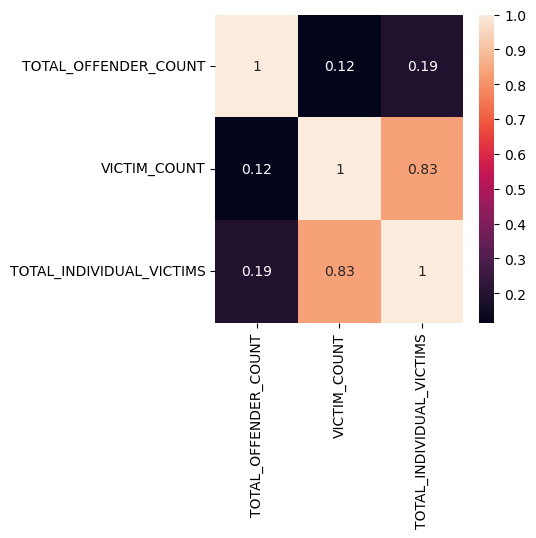

In [15]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### The victim count and the total individual victims have strong correlation of 0.83, which makes sense. As the total number of individual victims increase, so will the victim count. There are weak correlations between the victim count and total offender count and between the total offender count and total individual victims. 

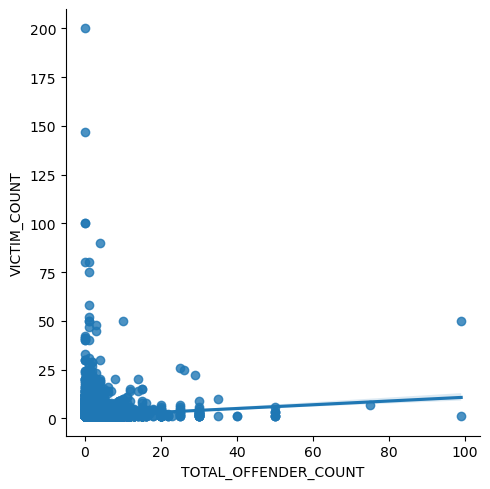

In [16]:
# Scatterplot for the "TOTAL_OFFENDER_COUNT" and the "VICTIM_COUNT"
sns.lmplot(x='TOTAL_OFFENDER_COUNT', y ='VICTIM_COUNT', data = df)

#### There is an upward trend line. A lot of the points are clustered around the beginning of line and the rest of the points are outliers. Based on the scatterplot, there seems to be a positive relationship, but not a strong one. 

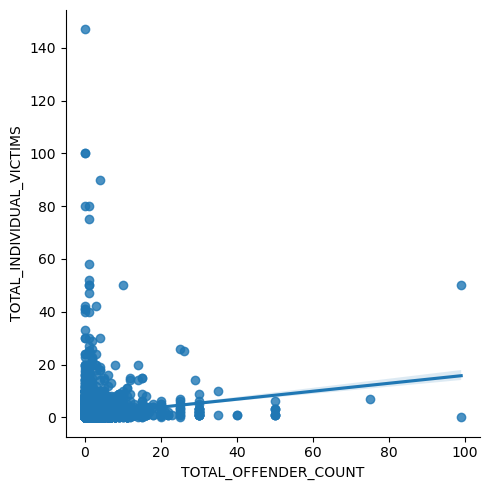

In [17]:
# Scatterplot for the "TOTAL_OFFENDER_COUNT" and the "TOTAL_INDIVIDUAL_VICTIMS"
sns.lmplot(x='TOTAL_OFFENDER_COUNT', y ='TOTAL_INDIVIDUAL_VICTIMS', data = df)

#### There is an upward trend line. A lot of the points are clustered around the beginning of line and the rest of the points are outliers. Based on the scatterplot, there seems to be a positive relationship, but not a strong one. However, it does seem to be a stronger positive relationship than the scatterplot of total offender count vs. victim count. 

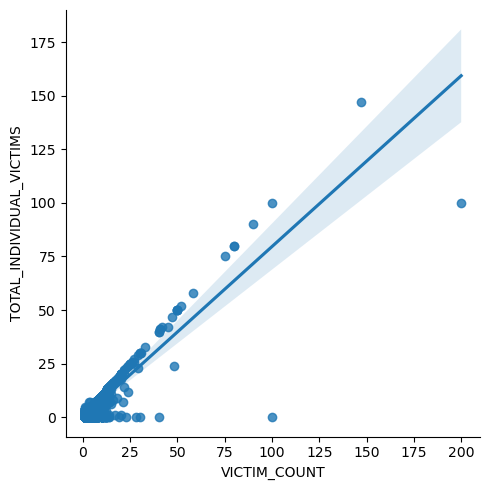

In [18]:
# Scatterplot for the "VICTIM_COUNT" and the "TOTAL_INDIVIDUAL_VICTIMS"
sns.lmplot(x='VICTIM_COUNT', y ='TOTAL_INDIVIDUAL_VICTIMS', data = df)

#### There is an upward trend line. A lot of the points are clustered around the beginning of line and some of the points are outliers. Based on the scatterplot, there seems to be a strong positive relationship. Out of all three scatterplots, the relationship between the victim count and the total individual victims is the strongest. 

In [19]:
sub.columns

Index(['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT', 'TOTAL_INDIVIDUAL_VICTIMS'], dtype='object')

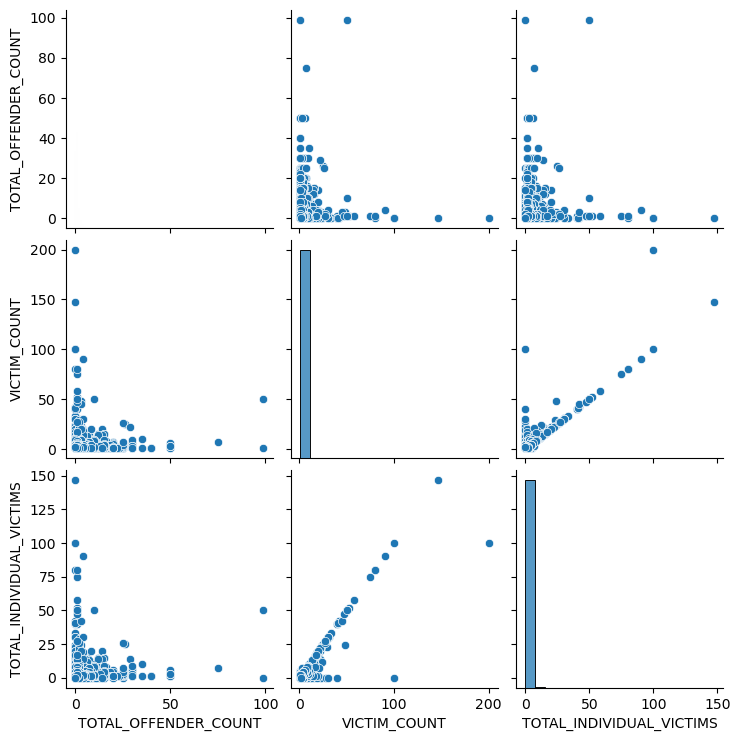

In [20]:
g = sns.pairplot(sub)

#### As mentioned before, there is a strong positive relationship between the total individual victims and victim count. 

<AxesSubplot:xlabel='TOTAL_INDIVIDUAL_VICTIMS', ylabel='Count'>

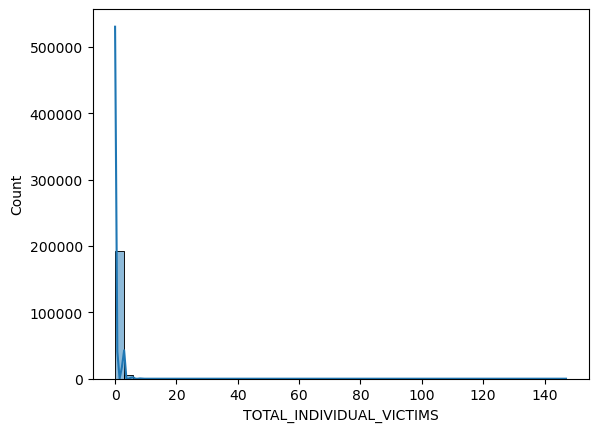

In [21]:
#Create a categorical plot. 
sns.histplot(df['TOTAL_INDIVIDUAL_VICTIMS'], bins = 50, kde = True)

In [22]:
df.loc[df['TOTAL_INDIVIDUAL_VICTIMS'] < 2, 'Individual Victim Category'] = 'Low Victim Count'

In [23]:
df.loc[(df['TOTAL_INDIVIDUAL_VICTIMS'] >= 2) & (df['TOTAL_INDIVIDUAL_VICTIMS'] < 10),'Individual Victim Category'] = 'Median Victim Count' 

In [24]:
df.loc[df['TOTAL_INDIVIDUAL_VICTIMS'] >= 10, 'Individual Victim Category'] = 'High Victim Count'

In [25]:
df['TOTAL_INDIVIDUAL_VICTIMS'].value_counts(dropna = False)

1      132053
0       43627
2       17527
3        3930
4        1367
5         582
6         271
7         120
8          82
10         61
9          47
12         18
11         17
13         11
14         10
20          9
16          7
15          7
25          5
18          4
30          4
50          4
17          3
24          3
19          3
41          2
22          2
80          2
23          2
100         2
42          2
40          2
26          2
58          1
33          1
147         1
90          1
29          1
52          1
47          1
75          1
27          1
Name: TOTAL_INDIVIDUAL_VICTIMS, dtype: int64

In [26]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS', 'Individual Victim Category'],
      dtype='object')

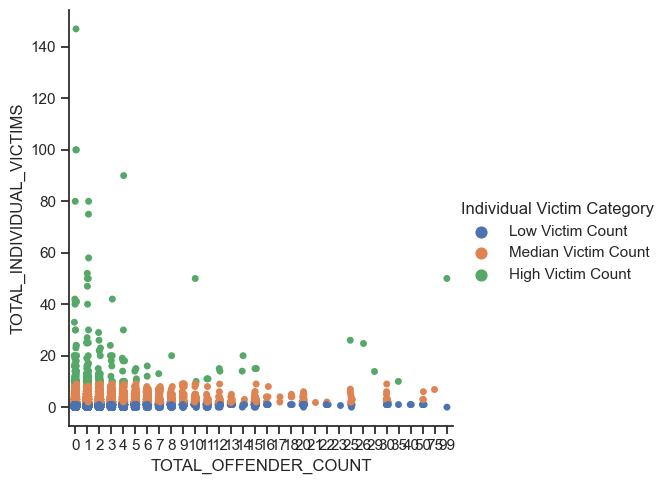

In [27]:
sns.set(style="ticks")
g = sns.catplot(x="TOTAL_OFFENDER_COUNT", y="TOTAL_INDIVIDUAL_VICTIMS", hue="Individual Victim Category", data=df)

### Questions

#### 1. What type of hate crimes are more prevalent throughout 1991-2018?
#### 2. Which ethnic group was most affected, and which ethnic group was least affected?
#### 3. Which states had the most hate crimes reported throughout 1991-2018?

##### These questions were not answered in this exploration. 

### Hypotheses

#### If the total individual victims count increases, then the victim count increases.